In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("oddsData.csv")
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal
0,2007-10-30,2008,Utah,@,Golden State,117,96,100.0,-120.0,212.0,1.0,105.5
1,2007-10-30,2008,LA Lakers,vs,Houston,93,95,190.0,-230.0,199.0,5.0,99.0
2,2007-10-30,2008,Houston,@,LA Lakers,95,93,-230.0,190.0,199.0,-5.0,99.0
3,2007-10-30,2008,San Antonio,vs,Portland,106,97,-1400.0,900.0,189.5,-13.0,95.0
4,2007-10-30,2008,Portland,@,San Antonio,97,106,900.0,-1400.0,189.5,13.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,@,New York,123,121,100.0,-120.0,218.5,1.5,106.5
37100,2023-01-16,2023,Memphis,vs,Phoenix,136,106,-800.0,550.0,231.0,-12.5,118.0
37101,2023-01-16,2023,New York,vs,Toronto,121,123,-120.0,100.0,218.5,-1.5,106.5
37102,2023-01-16,2023,Minnesota,vs,Utah,125,126,-175.0,155.0,232.0,-4.0,119.0


In [53]:
df['win'] = df['score'] < df['opponentScore']

In [54]:
from sklearn.preprocessing import LabelEncoder

df_onehot = df.copy(deep=True)

categorical_cols = []
def label_encode(column, df, targets=None):
    if targets == None:
        targets = [column]

    encoder = LabelEncoder()
    encoder.fit(df[column])

    for target in targets:
        df[target] = encoder.transform(df[target])

    categorical_cols.extend(targets)
    return df

df = label_encode('home/visitor', df)
df = label_encode('win', df)

df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal,win
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,1.0,105.5,0
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,5.0,99.0,1
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,-5.0,99.0,0
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,-13.0,95.0,0
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,13.0,95.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,1.5,106.5,0
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,-12.5,118.0,0
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,-1.5,106.5,1
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,-4.0,119.0,1


In [55]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = []
def onehot_encode(column, df, targets=None):
    if targets == None:
        targets = [column]

    cats = []
    for item in df[column]:
        if item not in cats:
            cats.append(item)

    added_names = []
    for cat in cats:
        for target in targets:
            added_names.append(target + "-" + cat)
            df[target + "-" + cat] = (df[target] == cat).astype(int)

    return df, added_names

df, onehot_teams = onehot_encode('team', df, ['team', 'opponent'])

df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,team-LA Clippers,opponent-LA Clippers,team-Charlotte,opponent-Charlotte,team-Boston,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,...,0,0,0,0,0,0,0,0,0,0
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,...,0,0,0,0,0,0,0,0,0,0
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,...,0,0,0,0,0,0,0,0,0,0
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,...,0,0,0,0,0,0,0,0,0,0
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,...,0,0,0,0,0,0,0,0,0,0
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,...,0,0,0,0,0,0,0,0,0,0
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,...,0,0,0,0,0,0,0,0,0,0
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# change date column to numpy.dattetime64 object
df['date'] = pd.to_datetime(df['date'])

# split datetime object into year, month, day, day of week columns
# Monday = 0, Sunday = 6
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,team-Boston,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn,year,month,day,day_of_week
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,...,0,0,0,0,0,0,2007,10,30,1
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,...,0,0,0,0,0,0,2007,10,30,1
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,...,0,0,0,0,0,0,2007,10,30,1
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,...,0,0,0,0,0,0,2007,10,30,1
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,...,0,0,0,0,0,0,2007,10,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,...,0,0,0,0,0,0,2023,1,16,0
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,...,0,0,0,0,0,0,2023,1,16,0
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,...,0,0,0,0,0,0,2023,1,16,0
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,...,0,0,0,0,0,0,2023,1,16,0


In [57]:
# calculate win rate of the team considering all games before the current game in this season
df['games_played'] = df.groupby(['team', 'season']).cumcount()
df['cumulative_wins'] = df.groupby(['team', 'season'])['win'].cumsum() - df['win']
df['cumulative_win_rate'] = df['cumulative_wins'] / df['games_played']
df['cumulative_win_rate'] = df['cumulative_win_rate'].fillna(0)  # Handle first game of the season
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn,year,month,day,day_of_week,games_played,cumulative_wins,cumulative_win_rate
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,...,0,0,0,2007,10,30,1,0,0,0.000000
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,...,0,0,0,2007,10,30,1,0,0,0.000000
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,...,0,0,0,2007,10,30,1,0,0,0.000000
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,...,0,0,0,2007,10,30,1,0,0,0.000000
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,...,0,0,0,2007,10,30,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,...,0,0,0,2023,1,16,0,43,24,0.558140
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,...,0,0,0,2023,1,16,0,42,13,0.309524
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,...,0,0,0,2023,1,16,0,44,19,0.431818
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,...,0,0,0,2023,1,16,0,44,22,0.500000


In [58]:
# calculate average score of the team considering all games before the current game in this season
df['cumulative_score'] = df.groupby(['team', 'season'])['score'].cumsum() - df['score']
df['average_score'] = df['cumulative_score'] / df['games_played']
df['average_score'] = df['average_score'].fillna(0)  # Handle first game of the season
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,opponent-Brooklyn,year,month,day,day_of_week,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,...,0,2007,10,30,1,0,0,0.000000,0,0.000000
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,...,0,2007,10,30,1,0,0,0.000000,0,0.000000
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,...,0,2007,10,30,1,0,0,0.000000,0,0.000000
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,...,0,2007,10,30,1,0,0,0.000000,0,0.000000
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,...,0,2007,10,30,1,0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,...,0,2023,1,16,0,43,24,0.558140,4806,111.767442
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,...,0,2023,1,16,0,42,13,0.309524,4919,117.119048
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,...,0,2023,1,16,0,44,19,0.431818,5021,114.113636
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,...,0,2023,1,16,0,44,22,0.500000,5051,114.795455


In [59]:
# calculate win rate of the team versus the opponent considering all games versus this opponent before the current game in this season
# is this necessary?
df['opponent_games_played'] = df.groupby(['team', 'season', 'opponent']).cumcount()
df['opponent_cumulative_wins'] = df.groupby(['team', 'season', 'opponent'])['win'].cumsum() - df['win']
df['opponent_win_rate'] = df['opponent_cumulative_wins'] / df['opponent_games_played']
df['opponent_win_rate'] = df['opponent_win_rate'].fillna(0)
df

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,day,day_of_week,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,opponent_games_played,opponent_cumulative_wins,opponent_win_rate
0,2007-10-30,2008,Utah,0,Golden State,117,96,100.0,-120.0,212.0,...,30,1,0,0,0.000000,0,0.000000,0,0,0.0
1,2007-10-30,2008,LA Lakers,1,Houston,93,95,190.0,-230.0,199.0,...,30,1,0,0,0.000000,0,0.000000,0,0,0.0
2,2007-10-30,2008,Houston,0,LA Lakers,95,93,-230.0,190.0,199.0,...,30,1,0,0,0.000000,0,0.000000,0,0,0.0
3,2007-10-30,2008,San Antonio,1,Portland,106,97,-1400.0,900.0,189.5,...,30,1,0,0,0.000000,0,0.000000,0,0,0.0
4,2007-10-30,2008,Portland,0,San Antonio,97,106,900.0,-1400.0,189.5,...,30,1,0,0,0.000000,0,0.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,2023,Toronto,0,New York,123,121,100.0,-120.0,218.5,...,16,0,43,24,0.558140,4806,111.767442,2,1,0.5
37100,2023-01-16,2023,Memphis,1,Phoenix,136,106,-800.0,550.0,231.0,...,16,0,42,13,0.309524,4919,117.119048,2,1,0.5
37101,2023-01-16,2023,New York,1,Toronto,121,123,-120.0,100.0,218.5,...,16,0,44,19,0.431818,5021,114.113636,2,1,0.5
37102,2023-01-16,2023,Minnesota,1,Utah,125,126,-175.0,155.0,232.0,...,16,0,44,22,0.500000,5051,114.795455,2,1,0.5


In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def standardize(column):
    df[column] -= df[column].mean()
    df[column] /= df[column].std()

def normalize(column):
    df[column] -= df[column].min()
    df[column] /= df[column].max()

In [61]:
from scipy.stats import shapiro
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    result = shapiro(df[col].sample(1000, random_state=42))
    stat, p_val = result.statistic, result.pvalue
    print(f'Variable {col}, Statistic: {stat}, p-value: {p_val}')
    if (p_val < 0.05):
        normalize(col)
        print(f'{col} is not normally distributed')
    else:
        standardize(col)
        print(f'{col} is normally distributed')

    print()

df

Variable season, Statistic: 0.9489112496376038, p-value: 3.997433855404374e-18
season is not normally distributed

Variable home/visitor, Statistic: 0.6365317702293396, p-value: 1.3682278205667514e-41
home/visitor is not normally distributed

Variable score, Statistic: 0.9973709583282471, p-value: 0.10523498803377151
score is normally distributed

Variable opponentScore, Statistic: 0.9980179667472839, p-value: 0.29022809863090515
opponentScore is normally distributed

Variable moneyLine, Statistic: 0.6321099996566772, p-value: 9.11965040582591e-42
moneyLine is not normally distributed

Variable opponentMoneyLine, Statistic: 0.7641377449035645, p-value: 1.5213425245644e-35
opponentMoneyLine is not normally distributed

Variable total, Statistic: 0.9867267608642578, p-value: 7.128070222961469e-08
total is not normally distributed

Variable spread, Statistic: 0.9882119297981262, p-value: 3.381368287591613e-07
spread is not normally distributed

Variable secondHalfTotal, Statistic: 0.98991

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,...,day,day_of_week,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,opponent_games_played,opponent_cumulative_wins,opponent_win_rate
0,2007-10-30,0.0,Utah,0.0,Golden State,0.975165,-0.603974,0.671795,0.660513,0.515528,...,0.966667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2007-10-30,0.0,LA Lakers,1.0,Houston,-0.829566,-0.679171,0.676410,0.654872,0.354037,...,0.966667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2007-10-30,0.0,Houston,0.0,LA Lakers,-0.679171,-0.829566,0.654872,0.676410,0.354037,...,0.966667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2007-10-30,0.0,San Antonio,1.0,Portland,0.147997,-0.528777,0.594872,0.712821,0.236025,...,0.966667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2007-10-30,0.0,Portland,0.0,San Antonio,-0.528777,0.147997,0.712821,0.594872,0.236025,...,0.966667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,2023-01-16,1.0,Toronto,0.0,New York,1.426347,1.275953,0.671795,0.660513,0.596273,...,0.500000,0.000000,0.530864,0.338028,0.558140,0.502194,0.798339,0.666667,0.333333,0.5
37100,2023-01-16,1.0,Memphis,1.0,Phoenix,2.403910,0.147997,0.625641,0.694872,0.751553,...,0.500000,0.000000,0.518519,0.183099,0.309524,0.514002,0.836565,0.666667,0.333333,0.5
37101,2023-01-16,1.0,New York,1.0,Toronto,1.275953,1.426347,0.660513,0.671795,0.596273,...,0.500000,0.000000,0.543210,0.267606,0.431818,0.524660,0.815097,0.666667,0.333333,0.5
37102,2023-01-16,1.0,Minnesota,1.0,Utah,1.576742,1.651939,0.657692,0.674615,0.763975,...,0.500000,0.000000,0.543210,0.309859,0.500000,0.527795,0.819968,0.666667,0.333333,0.5


In [62]:
iterm = df["score"]*df["opponentScore"]

<AxesSubplot: ylabel='Count'>

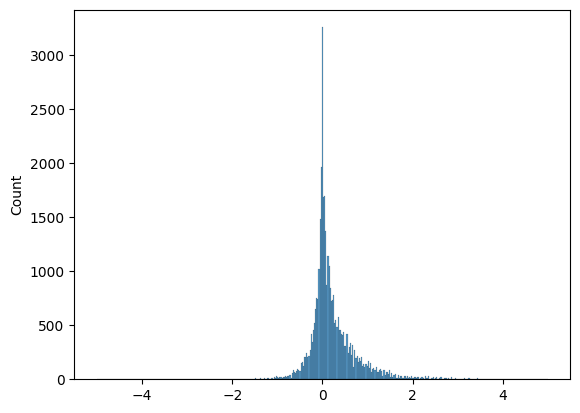

In [63]:
sns.histplot(iterm/2, binrange=[-5,5])

In [64]:
diff = np.abs(df["score"]-df["opponentScore"])

<AxesSubplot: ylabel='Count'>

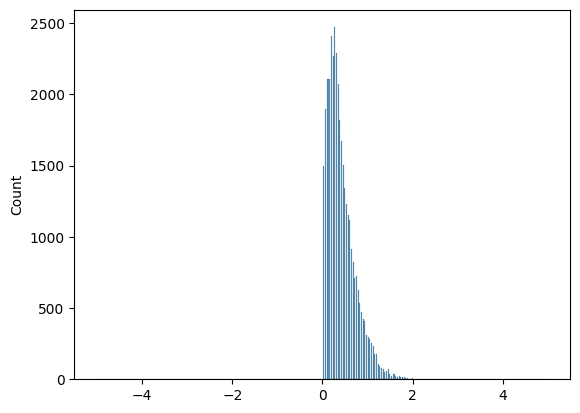

In [65]:
sns.histplot(diff/2,binrange=[-5,5])

In [66]:
df2 = pd.read_csv("oddsData.csv")
df2 = df2[df2["home/visitor"]=="@"]
df2

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal
0,2007-10-30,2008,Utah,@,Golden State,117,96,100.0,-120.0,212.0,1.0,105.5
2,2007-10-30,2008,Houston,@,LA Lakers,95,93,-230.0,190.0,199.0,-5.0,99.0
4,2007-10-30,2008,Portland,@,San Antonio,97,106,900.0,-1400.0,189.5,13.0,95.0
7,2007-10-31,2008,Dallas,@,Cleveland,92,74,-140.0,120.0,184.0,-2.5,91.5
9,2007-10-31,2008,Seattle,@,Denver,103,120,625.0,-825.0,217.5,11.5,107.5
...,...,...,...,...,...,...,...,...,...,...,...,...
37094,2023-01-16,2023,Phoenix,@,Memphis,106,136,550.0,-800.0,231.0,12.5,118.0
37096,2023-01-16,2023,Indiana,@,Milwaukee,119,132,175.0,-200.0,228.5,5.0,112.0
37097,2023-01-16,2023,Utah,@,Minnesota,126,125,155.0,-175.0,232.0,4.0,119.0
37099,2023-01-16,2023,Toronto,@,New York,123,121,100.0,-120.0,218.5,1.5,106.5


In [67]:
print(np.sum(df2[df2["team"]=="Utah"][df2["opponent"]=="Golden State"]))
print(np.sum(df2[df2["team"]=="Golden State"][df2["opponent"]=="Utah"]))

date                 2007-10-302009-02-082009-03-012010-02-192010-0...
season                                                           58456
team                 UtahUtahUtahUtahUtahUtahUtahUtahUtahUtahUtahUt...
home/visitor                             @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
opponent             Golden StateGolden StateGolden StateGolden Sta...
score                                                             2929
opponentScore                                                     3068
moneyLine                                                       5465.0
opponentMoneyLine                                             -12246.0
total                                                           6198.5
spread                                                            86.5
secondHalfTotal                                                 3160.0
dtype: object
date                 2007-11-032008-02-192009-01-052009-04-112010-0...
season                                                         

/var/folders/zk/684rggrn76sf_fhg61wgw21r0000gn/T/ipykernel_18787/1392002858.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(np.sum(df2[df2["team"]=="Utah"][df2["opponent"]=="Golden State"]))
/var/folders/zk/684rggrn76sf_fhg61wgw21r0000gn/T/ipykernel_18787/1392002858.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(np.sum(df2[df2["team"]=="Golden State"][df2["opponent"]=="Utah"]))


In [68]:
periodic_cols = ['day', 'day_of_week', 'month']

for col in periodic_cols:
    df['sin_' + col] = np.sin(np.pi * df[col])

In [69]:
from sklearn.preprocessing import PolynomialFeatures

expand_cols = []

poly = PolynomialFeatures(3)
for col in expand_cols:
    poly.fit_transform(col)

In [70]:
input_cols = ['season', 'team', 'home/visitor', 'opponent', 'day', 'day_of_week', 'month',
              'games_played', 'cumulative_wins', 'cumulative_win_rate', 'cumulative_score', 'average_score', 
              'opponent_games_played', 'opponent_cumulative_wins', 'opponent_win_rate',
              'sin_day', 'sin_day_of_week', 'sin_month']

input_cols.extend(onehot_teams)

output_cols = ['moneyLine', 'total', 'spread', 'secondHalfTotal', 'score']

In [71]:
df[input_cols].to_csv("inputs.csv", index=False)
df[output_cols].to_csv("outputs.csv", index=False)